#### MDTF diagostics: checking pre-processors and files

In [2]:
# Import modules used in the POD
import os
import matplotlib

#matplotlib.use('Agg')  # non-X windows backend
import matplotlib.pyplot as plt
import numpy as np
import intake
import sys
import yaml

# WMT
from pathlib import Path
import xarray as xr
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [3]:
stats_dir = Path('/pscratch/sd/w/wmtsai/MDTF_POD_diags/wkdir/MDTF_output/MCS_precip_buoy_stats/model/netCDF/MPI-ESM1-2-HR_historical_r1i1p1f1/stats')
ds_mcs = xr.open_dataset(stats_dir / 'BLprec_1D_multiregions_mcsgrids.nc')
ds_deep = xr.open_dataset(stats_dir / 'BLprec_1D_multiregions_deepgrids.nc')
ds_other = xr.open_dataset(stats_dir / 'BLprec_1D_multiregions_othergrids.nc')

In [ ]:
ds_other.sum(dim='region').samples.plot(color='k')
ds_deep.sum(dim='region').samples.plot(color='b')
ds_mcs.sum(dim='region').samples.plot(color='r')

In [ ]:
work_dir = Path(os.environ['WORK_DIR'])
work_dir = work_dir / 'MDTF_output/MCS_precip_buoy_stats'
csv_mcs = pd.read_csv(work_dir.parent / 'MDTF_postprocessed_data.csv')
source_id = csv_mcs['source_id'][0]
experiment_id = csv_mcs['experiment_id'][0]
parent_variant_label = csv_mcs['member_id'][0]
case_fullname = '{}_{}_{}'.format(source_id, experiment_id, parent_variant_label)
netcdf_dir = work_dir / 'model/netCDF/{}_{}_{}'.format(source_id, experiment_id, parent_variant_label) 
stats_dir = netcdf_dir / 'stats'        
# create the stats folder to save finalized data 
thetae_dir = netcdf_dir / 'layer_averaged_thetae'
if thetae_dir.exists() == False:
    raise FileNotFoundError("No layer-averaged thetae files to be read. Please check your settings.jsonc")
mcsmask_dir = netcdf_dir / 'MCS_identifiers'
if mcsmask_dir.exists() == False:
    raise FileNotFoundError("No MCS mask files to be read. Please check your settings.jsonc")

# read the thetae data for diagnostics
thetae_file = list(thetae_dir.glob('layer_averaged_thetae.*.nc'))[0]
ds_thetae = xr.open_dataset(thetae_file)
# read the MCS data for diagnostics
mcsfiles = list(mcsmask_dir.glob('cloudid_PyFLEXTRKR_mcs_*.nc'))
ds_mcs = xr.open_mfdataset(mcsfiles).sel(lat=slice(-30,30))
tb_threshold_coldanvil = float(ds_mcs.attrs['tb_threshold_coldanvil']) # get Tb thershold set 

In [ ]:
ds_mcs.precipitation.isel(time=20)

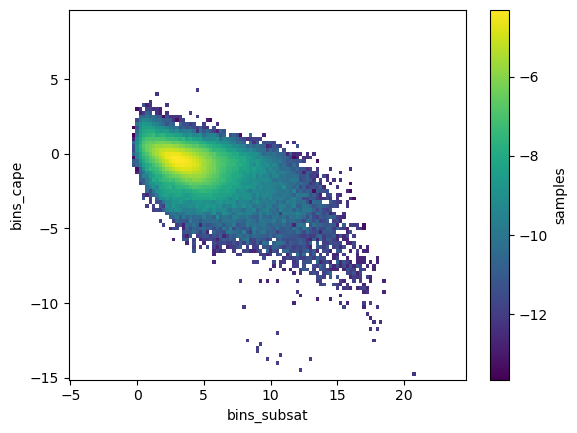

In [10]:
pdf.plot()

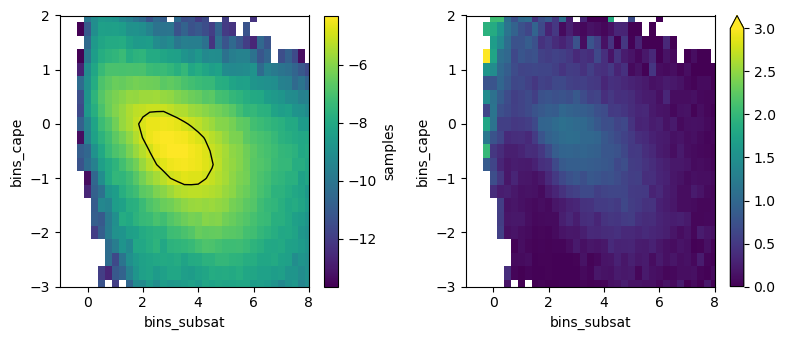

In [7]:
tmp = xr.open_dataset('/pscratch/sd/w/wmtsai/MDTF_POD_diags/wkdir/MDTF_output/MCS_precip_buoy_stats/model/netCDF/MPI-ESM1-2-HR_historical_r1i1p1f1/stats/BLprec_2D_multiregions_mcsgrids.nc')

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3.5))

samples = tmp.samples.sum(dim='region')
prec_sum = tmp.prec_sum.sum(dim='region')
cond_prec = prec_sum/samples
pdf = np.log((samples/samples.sum(dim=(['bins_cape','bins_subsat']))))
pdf.plot(ax=ax1)
pdf.plot.contour(ax=ax1, levels=np.arange(-5,-1,1), colors=['k'], linewidths=1)
cond_prec.plot(ax=ax2, vmin=0, vmax=3)
ax1.set_xlim([-1,8])
ax1.set_ylim([-3,2])
ax2.set_xlim([-1,8])
ax2.set_ylim([-3,2])
plt.tight_layout()

In [ ]:
# # Receive a dictionary of case information from the framework
# print("reading case_info")
# case_env_file = '/pscratch/sd/w/wmtsai/MDTF-diagnostics/diagnostics/example_multicase/case_info_demo_WMT.yml'
# #case_env_file = os.environ["case_env_file"]
# assert os.path.isfile(case_env_file), f"case environment file not found"
# with open(case_env_file, 'r') as stream:
#     try:
#         case_info = yaml.safe_load(stream)
#     except yaml.YAMLError as exc:
#         print(exc)

# cat_def_file = case_info['CATALOG_FILE']
# case_list = case_info['CASE_LIST']
# # all cases share variable names and dimension coords in this example, so just get first result for each
# tas_var = [case['tas_var'] for case in case_list.values()][0]
# time_coord = [case['time_coord'] for case in case_list.values()][0]
# lat_coord = [case['lat_coord'] for case in case_list.values()][0]
# lon_coord = [case['lon_coord'] for case in case_list.values()][0]

In [ ]:
# import os
# import sys
# import numpy as np
# import xarray as xr
# import pandas as pd
# from pathlib import Path
# import matplotlib.pyplot as plt

In [ ]:
work_dir = os.environ["WORK_DIR"]
# Receive a dictionary of case information from the framework
print("reading case_info")
# Remove following line final PR
os.environ["case_env_file"] = os.path.join(work_dir + "/MDTF_output/MCS_precip_buoy_stats", "case_info.yml")
case_env_file = os.environ["case_env_file"]
assert os.path.isfile(case_env_file), f"case environment file not found"
with open(case_env_file, 'r') as stream:
    try:
        case_info = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

cat_def_file = case_info['CATALOG_FILE']
case_list = case_info['CASE_LIST']
# all cases share variable names and dimension coords in this example, so just get first result for each
pr_var = [case['pr_var'] for case in case_list.values()][0]
rlut_var =  [case['rlut_var'] for case in case_list.values()][0]
time_coord = [case['time_coord'] for case in case_list.values()][0]
lat_coord = [case['lat_coord'] for case in case_list.values()][0]
lon_coord = [case['lon_coord'] for case in case_list.values()][0]
# open the csv file using information provided by the catalog definition file
cat = intake.open_esm_datastore(cat_def_file)
# filter catalog by desired variable and output frequency
vars_subset = cat.search(variable_id=[pr_var,rlut_var])
# examine assets for a specific file
#tas_subset['CMIP.synthetic.day.r1i1p1f1.day.gr.atmos.r1i1p1f1.1980-01-01-1984-12-31'].df
# convert tas_subset catalog to an xarray dataset dict
vars_dict = vars_subset.to_dataset_dict(progressbar=False,
    xarray_open_kwargs={"decode_times": True, "use_cftime": True}
)

In [ ]:
for key in vars_dict.keys():
    data = vars_dict[key]
data

In [ ]:
cat['MPI-M.MPI-ESM1-2-HR.r1i1p1f1.historical.hr.3hr.gn.atmos.r1i1p1f1'].df

In [ ]:
tmp = xr.open_dataset('/pscratch/sd/w/wmtsai/MDTF_POD_diags/wkdir/MDTF_output/MDTF_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_20050101000000_20051231000000/3hr/MPI-ESM1-2-HR_historical_r1i1p1f1_gn.rlut.3hr.nc')
tmp

In [ ]:
(tmp.rlut.isel(time=0)).plot()

In [ ]:
csvFile_mcs

In [ ]:
csvFile = pd.read_csv('/pscratch/sd/w/wmtsai/MDTF_POD_diags/catalogs/MPI-ESM1-2-HR_historical_r1i1p1f1_full.csv')
#for key in csvFile_mcs.keys():
#    print(key)
csvFile

In [ ]:
csvFile['path'][3]

In [ ]:
case_env_file

In [ ]:
work_dir = os.environ["WORK_DIR"]
# Receive a dictionary of case information from the framework
print("reading case_info")
# Remove following line final PR
os.environ["case_env_file"] = os.path.join(work_dir + "/MDTF_output/example_multicase", "case_info.yml")
case_env_file = os.environ["case_env_file"]
assert os.path.isfile(case_env_file), f"case environment file not found"

In [ ]:
case_env_file

In [ ]:
# get information from the yaml file
dir_main = Path(os.environ['CODE_ROOT'])
with open(dir_main / "templates/runtime_config.mcstest.yml") as runtime_yml:
    try:
        runtime_info = yaml.safe_load(runtime_yml)
        case_list = runtime_info['case_list']
        for key in case_list.keys():
            model_name = case_list[key]['model']
            print(model_name)
    except yaml.YAMLError as exc:
        print(exc)

In [ ]:
for key in case_list.keys():
    print(key)

In [ ]:
# 
dir_catalog = Path('/pscratch/sd/w/wmtsai/MDTF_POD_diags/catalogs')
cat_def_file = dir_catalog / 'MPI-ESM1-2-HR_historical_r1i1p1f1.json'
cat = intake.open_esm_datastore(cat_def_file)
pr_var = 'pr'
pr_subset = cat.search(variable_id=pr_var, frequency="3hr")
pr_subset 

In [ ]:
ds = xr.open_dataset(df.path[0])
ds

In [ ]:
start_time = datetime.strptime('20050101.0000', "%Y%m%d.%H%M")
end_time = datetime.strptime('20050201.0000', "%Y%m%d.%H%M")

In [ ]:
tmp = xr.open_dataset('/pscratch/sd/w/wmtsai/MDTF_POD_diags/wkdir/stats/MPI-ESM1-2-HR_historical_r1i1p1f1/precip_mcsstats_monthly.2005.nc')
tmp

In [1]:
ds = tmp

fig, ax = plt.subplots(1,1,figsize=(10,3),subplot_kw={'projection': ccrs.PlateCarree(180)})

ax.coastlines(color='k',linewidth=0.5)
ax.add_feature(cfeat.LAND,zorder=3,edgecolor='grey',facecolor='none',linewidth=0.3) # maskout LAND
ax.add_feature(cfeat.BORDERS,zorder=3,edgecolor='grey',facecolor='none',linewidth=0.3)
ax.spines[:].set_visible(False)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                linewidth=0.1, color='grey', alpha=0.4, linestyle=':')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8, 'color': 'k'}
gl.ylabel_style = {'size': 8, 'color': 'k'}

# 1. contribution of total rainfall from MCSs (%)
cp = ax.pcolormesh(ds.lon, ds.lat, 100*ds.mcspr_sum.sum(('month'))/ds.tpr_sum.sum(('month'))
                , cmap=mymap, vmin=10, vmax=80,
                transform=ccrs.PlateCarree())
cp.cmap.set_under('w')
cbar = plt.colorbar(cp,ax=ax,shrink=0.8,pad=0.01,extend='both')
cbar.set_ticks([10,20,30,40,50,60,70,80])
cbar.set_label('Contribution (%)',fontsize=8)
cbar.ax.tick_params(labelsize=8)
# 2. frequency of MCSs (%)
cf = ax.contour(ds.lon, ds.lat, 100*ds.mcs_freq.mean(('month','year'))
                , levels=[10],colors=['k'],linewidths=1,
                transform=ccrs.PlateCarree())
ax.clabel(cf, fontsize=8)
ax.set_ylim([-30,30])

NameError: name 'tmp' is not defined

In [ ]:
tmp = xr.open_dataset('/pscratch/sd/w/wmtsai/MDTF_POD_diags/wkdir/stats/MPI-ESM1-2-HR_historical_r1i1p1f1/precip_mcsstats_monthly.2005.nc') # read the stat file
year = int(tmp.attrs['year_processed']) # e.g., 2000, 2001       
ds_merged = tmp
ds_merged.coords['year'] = np.array([year])

In [ ]:
ds_merged

In [ ]:
tmp = xr.open_dataset('/pscratch/sd/w/wmtsai/MDTF_POD_diags/wkdir/MDTF_output/MCS_precip_buoy_stats/model/netCDF/MPI-ESM1-2-HR_historical_r1i1p1f1/layer_averaged_thetae/layer_averated_thetae.test.nc')
tmp                      

In [ ]:
tmp.isel(time=0).thetae_lt.plot()

In [ ]:
tmp = xr.open_dataset('/pscratch/sd/w/wmtsai/MDTF_POD_diags/inputdata/model/MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200501010130-200912312230/6hr/MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200501010600-201001010000.hus.6hr.nc')
tmp

In [ ]:
work_dir = os.environ["WORK_DIR"]
# Receive a dictionary of case information from the framework
print("reading case_info")
# Remove following line final PR
#os.environ["case_env_file"] = os.path.join(work_dir + "/MDTF_output/MCS_precip_buoy_stats", "case_info.yml")
case_env_file = os.environ["case_env_file"]

In [ ]:
test_dir = Path('/pscratch/sd/w/wmtsai/MDTF_POD_diags/wkdir/MDTF_output/MCS_precip_buoy_stats/model/netCDF/MPI-ESM1-2-HR_historical_r1i1p1f1/stats')
tmp = 